In [1]:
import pickle
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.signal import butter, filtfilt

In [2]:
CUTOFF = 10
FS = 50
ORDER = 1

In [3]:
with open("imputed_sensor_data.pkl", "rb") as f:
    sensor_data = pickle.load(f)

In [4]:
def apply_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter(order, cutoff, fs=fs, btype="low", analog=False)
    y = filtfilt(b, a, data)
    return y

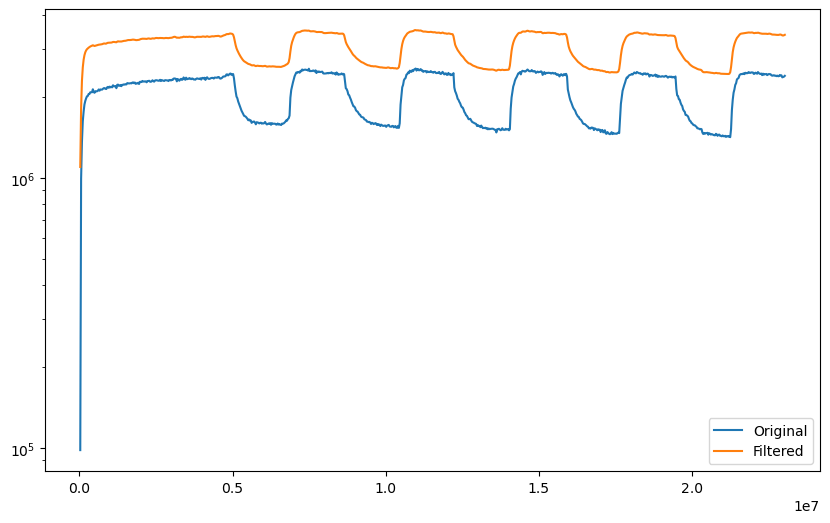

In [5]:
heater = sensor_data["air"][0][6]
gas_data = heater["Resistance Gassensor"].values
filtered_data = apply_lowpass_filter(gas_data, CUTOFF, FS, ORDER)
time = heater["Time Since PowerOn"].values

plt.figure(figsize=(10, 6))
plt.plot(time, gas_data, label="Original")
plt.plot(time, (filtered_data + 1e6), label="Filtered")
plt.yscale("log")
plt.legend()
plt.show()

In [6]:
for mat in ["air", "oils"]:
    for sensor in range(8):
        for heater in range(10):
            original = sensor_data[mat][sensor][heater]["Resistance Gassensor"]
            y_filtered = apply_lowpass_filter(original, CUTOFF, FS, ORDER)
            sensor_data[mat][sensor][heater]["Filtered"] = y_filtered

In [9]:
def plot_filtered_data(sensor_data, mat, sensor):
    title = f"Matrix {mat}, Sensor {sensor}"
    fig = go.Figure()
    for i, data in sensor_data[mat][sensor].items():
        fig.add_trace(go.Scatter(x=data["Time Since PowerOn"],
                                 y=data["Filtered"],
                                 mode="lines",
                                 name=f"Step {i}"))

    fig.update_layout(title=title, title_x=0.5, width=1000, height=600)

    fig.update_yaxes(type="log")
    fig.show()

In [10]:
plot_filtered_data(sensor_data, "oils", 3)

In [11]:
with open("lpf_sensor_data.pkl", "wb") as f:
    pickle.dump(sensor_data, f)